---
# Unit09: The Network and Array Methods

This notebook has the activities of the Course **ProSeisSN**. It deals with time series processing using a passive seismic dataset using [ObsPy](https://docs.obspy.org/).

#### Dependencies: Obspy, Numpy, Matplotlib
#### Reset the Jupyter notebook in order to run it again, press:
***Kernel*** -> ***Restart & Clear Output***
#### The code $\Downarrow$ BELOW $\Downarrow$ runs a notebook with other dependencies

---


In [1]:
#------ Import Libraries
import sys
import os
    
#------ Work with the directory structure to include auxiliary codes
print('\n Local directory ==> ', os.getcwd())
print('  - Contents: ', os.listdir(), '\n')

path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path+"/CodePy")

%run ../CodePy/ImpMod.ipynb

#------ Alter default matplotlib rcParams
from matplotlib import rcParams
import matplotlib.dates as dates
# Change the defaults of the runtime configuration settings in the global variable matplotlib.rcParams
plt.rcParams['figure.figsize'] = 9, 5
#plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["figure.subplot.hspace"] = (.9)
plt.rcParams['figure.dpi'] = 100
#------ Magic commands
%matplotlib inline
%matplotlib widget
#%pylab notebook
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2


 Local directory ==>  /media/jmt/DATA/R-D/COURSES/COPPE_24/Github/Unit09
  - Contents:  ['.ipynb_checkpoints', 'array1.png', 'Nbk09.ipynb', 'RayLo.png', 'ttbtide.png'] 

ObsPy version ==> 1.4.1


---
## Use data files from TTB22
- **The Receiver Array**
The array has 24 GS-20DX vertical geophones hooked to a $L=69$m cable, using takeouts spaced $\delta l=6$m from each other. The GS-20DX geophones have a natural frequency of $f_n=10\textrm{Hz}$, and a spurious frequency $f_{sp}>250$Hz. The array has a irregular circular shape, deployed in the Southern tip of the island, with its center at $\left(1^{\circ}12^{\prime}6.93^{\prime\prime}\textrm{S},48^{\circ}30^{\prime}23.39^{\prime\prime}\textrm{S}\right)$. Each of the 24 gather traces are $\Delta T=60$s long, with a sampling frequency of $f_{s}=250$Hz.
- **The data**
Files 3695 to 3810 were collected during 2h ebb tide with an amplitude of 0.91m.
| File | Timestamp | Tide (m) |
| :-: | :-: | :-: |
| 3695 | 2022-04-02T12:00:15 | 2.70 |
| 3810 | 2022-04-02T14:03:06 | 1.79 |
<img src="./ttbtide.png" width="500">

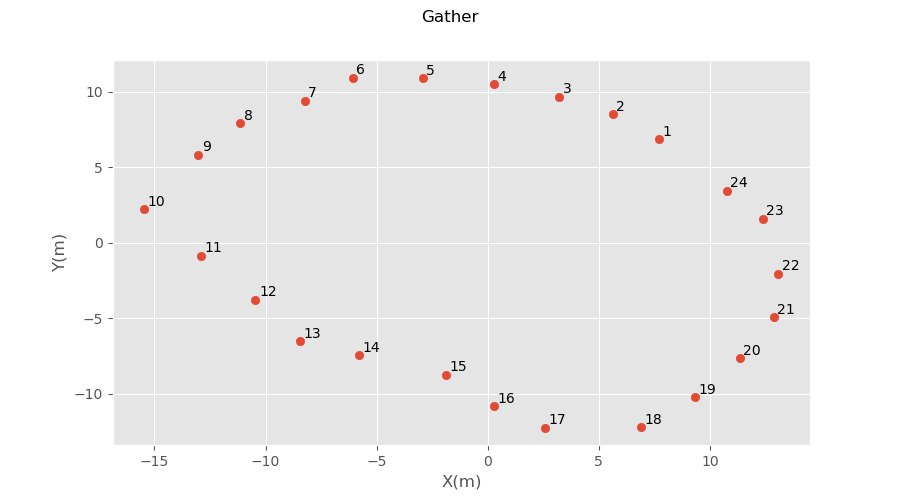

''

In [2]:
"""
====================== READ PHONES LOCATIONS ======================
"""
#------ Read the phones cartesian locations
#--- Reads the CSV file with (x, y)m locations
ttb_loc = u.RGloc('../Data/'+'ttb_loc.dat')
#------ Read the phones geographic locations
#--- Reads the CSV file with (lat,lon) in degress locations
ttb_gloc = u.RGloc('../Data/'+'ttb_gloc.dat')
#
#------ Plot gather in cartesian
p.pgather(ttb_loc[:,1], ttb_loc[:,2], ttb_loc[:,0], coord='cartesian')

---
### Read data files from TTB22

In [26]:
"""
====================== READ THE SEISMIC DATA LOCALLY ======================
File hints:
3710 and 3720 -> several events
3740 -> 2 events
3790 -> 1 event (6-9)s
"""
#------ Read the seismic data
ent = str(np.random.choice(np.arange(3700, 3811, 10)))
ent = input(f'   Enter a file number in [3695, 3810], rtn=random:\n') or ent
ent = ent.rstrip().split(' ')
print(f">> Read with data file {ent}")
ent = '../Data/ttb/'+ent[0]+'.dat'
#
#------- Read the data file as a SEG2 object.
st     = read(ent)
#
#------- Print stream information
dummy = float(st[-1].stats.seg2.RECEIVER_LOCATION)
print(f">> Gather acquired on {st[0].stats.starttime}, has {int(st[0].stats.npts)} data points.")

   Enter a file number in [3695, 3810], rtn=random:
 3790


>> Read with data file ['3790']
>> Gather acquired on 2022-04-02T13:41:44.000000Z, has 15000 data points.


---
### The code below can be run as many times as necessary

>> Baricenter bcenter is at AttribDict({'latitude': -1.201924971512567, 'longitude': -48.506498036629125, 'elevation': 5.0})



 Enter filter min and max frequencies (dflt = 5.0, 50.0) 


>> The mean of 1st original trace is -13.542529197865724
>> Notched original trace from 59.2 to True
>> Useful range due to bandpass 5.0 50.0 filter: 5.0 to 50.0Hz.
 Random phone 20 


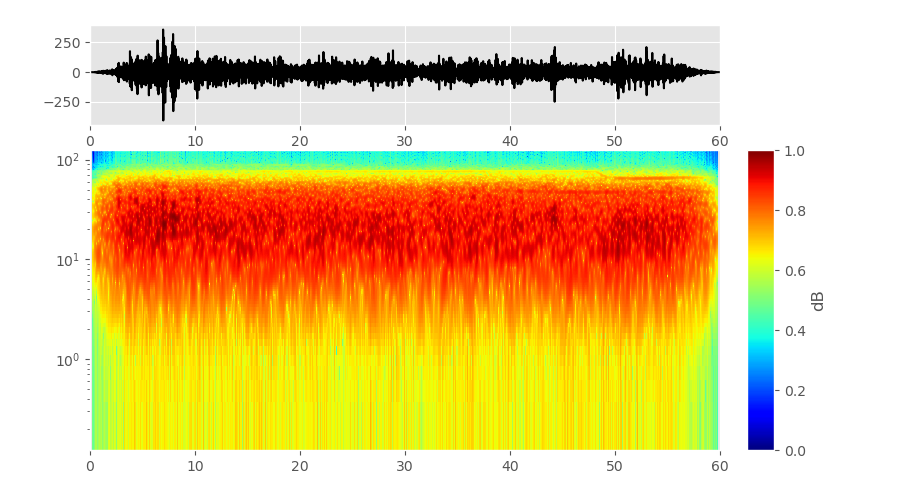

In [27]:
#
"""
================= Filter data and look at the frequency contents ======================
                    Create a new stream from the SEG2 stream
"""
#------ Create a new stream from the SEG2 stream.
#       1) Adds coordinates to gather. Stores a copy in gather0
#       2) Gather baricenter = bcenter.
gather, bcenter = u.creastrm(st, ttb_gloc)
gather0 = gather.copy()
#
#------- Filter the stream
#--- Filter parameters: change them as you wish.
MTparam = [ 1,   1,    'bp',  5.,   50.,   1,    0]
# └─────> [dtr, line, ftype, Fmin, Fmax, taper, gain]
ent = str(MTparam[3]) + ' ' + str(MTparam[4])
ent = input(f'\n Enter filter min and max frequencies (dflt = {MTparam[3]}, {MTparam[4]})') or ent
ent = ent.rstrip().split(' ')
MTparam[3], MTparam[4] = [float(dummy) for dummy in ent]
#
gather = u.otrstr(gather, MTparam)
#
#------- Check frequency contents to accept preprocessing
#--- Pick up a random phone/trace
ent = np.random.randint(1, len(st)+1)
print(f' Random phone {ent} ')
trZ = gather[ent - 1].copy()
#           +───────+─> Trace = Phone -1 
#--- Relative time: nummpy array
time = trZ.times(type="relative")
#--- Plot Trace+Spectrogram
p.Pspect(time, trZ)

---
## Display all the data as a seismogram
- A distance dependent plot shows the different move-out of seismic arrivals and gives an idea of the  backazimuth and slowness that could be expected.

In [ ]:
"""
====================== Plot Seismogram ======================
"""
gather.plot(type='section',
            scale=1.3, alpha=.7,
            orientation='horizontal')

 Enter t0 and t1 to zoom:  6 8


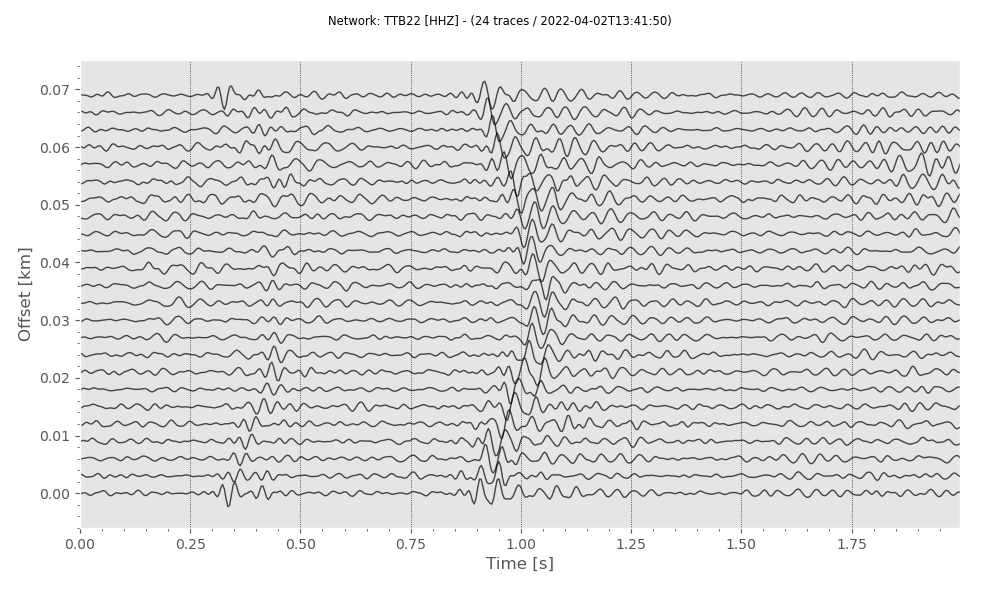

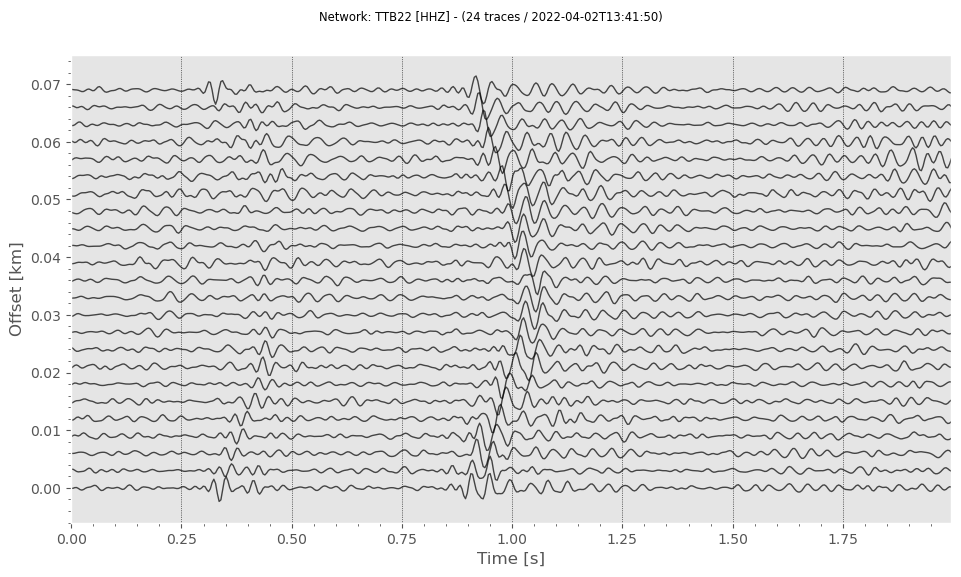

In [28]:
"""
====================== Zoom in to select [t0, t1]======================
"""
#------ Zoom in the seismogram
ent = input(f' Enter t0 and t1 to zoom: ')
ent = ent.rstrip().split(' ')
t0 = float(ent[0])
t1 = float(ent[1])
#
dt = gather[0].stats.starttime
gather.plot(type='section',
            scale=1.3, alpha=.7,
            starttime=dt+t0, endtime=dt+t1,
            orientation='horizontal')

---
### The direction-of-arrival (DOA)
A wavefront arrives at the surface at an angle $i$ with the vertical. The wave propagates toward the surface with a velocity $v_{c}=\frac{\Delta s}{\varDelta t}$, with a horizontal component $v_{h}=\frac{\Delta x}{\varDelta t}$. By geometry, the inclination angle and distances are related through:

The DOA of a planar wavefront onto a seismic 2-D array can be described by the horizontal slowness, $u_h$, which is the inverse value of horizontal apparent velocity, $1/v_{h}$
$$
u_{h}=\frac{1}{v_{h}}=\frac{\sin i}{\left|\mathbf{v}_{c}\right|},
$$
being related to: (a) the angle of incidence $i$, (b) the true velocity $v_c$ and (c) its azimuth with the North *toward* the epicenter; the **baz** ($\theta$).
$$
\boldsymbol{U}_0 = (\frac{\sin\theta}{v_{h}},\frac{\cos\theta}{v_{h}},\frac{1}{v_{h}\tan i})
                 = \frac{1}{v_{c}}(\sin i\sin\theta,\sin i\cos\theta,\cos i)
                 = u_{h}(\sin\theta,\cos\theta,\frac{1}{\tan i})
                 = \frac{1}{v_{c}}(\sin i\sin\theta,\sin i\cos\theta,\cos i).
$$

<img src="./array1.png" width="600">

### Beamforming
The seismic signals at each sensor can be time-shifted and summed to enhance the S/N ratio by a factor of $\sqrt{N}$, the signal interfering constructively. If a given sensor location in relation to the geographic center of the array is $\boldsymbol{r}_{i},\,i=1,\ldots,N$, its relative time shift is
$$
\tau_{i}=\boldsymbol{r}_{i}.\boldsymbol{u}.
$$
The beamforming for the array is,F
$$
		b\left(t\right)=\frac{1}{N}\mathop{\sum_{i=1}^{N}s_{i}\left(t+
			\mathbf{r}_{i}\mathbf{\cdot u}\right)}=\frac{1}{N}\mathop{\sum_{i=1}^{N}s_{i}\left(t+\tau_{i}\right)}.
$$

- The ObsPy FK beamforming outputs the relative power, or semblance and the absolute power, or FK power.

- Transforms the semblance $S$ to the Fisher or $F$-statistic as $F = (N-1) \frac{S}{1-S}$. $F\rightarrow1$ for white Gaussian noise, therefore if $F\neq1$ means that there is some signal.


>> Select start and end times (s) for beanforming
  stime etime
    └─────│──> Initial event time
          └──> Final event time


   Enter t0 t1:
 6 8



>>  F-K parameters
{'etime': UTCDateTime(2022, 4, 2, 13, 41, 52),
 'frqhigh': 50.0,
 'frqlow': 5.0,
 'prewhiten': 0,
 'semb_thres': -1000000000.0,
 'sl_s': 0.03,
 'sll_x': -3.0,
 'sll_y': -3.0,
 'slm_x': 3.0,
 'slm_y': 3.0,
 'stime': UTCDateTime(2022, 4, 2, 13, 41, 50),
 'timestamp': 'julsec',
 'vel_thres': -1000000000.0,
 'win_frac': 0.1,
 'win_len': 1.0}

>> Total time in Beamforming: 24.140741



>>  t   Fisher  FKpwr   baz(deg) vel(m/s)
   6.0, 3.35, 57116.57, 229.45, 261.1
   6.2, 4.55, 130295.89, 45.34, 282.27
   6.4, 6.23, 225652.07, 47.32, 272.27
   6.6, 7.04, 258520.08, 47.32, 272.27
   6.8, 7.96, 272384.45, 47.32, 272.27
   7.0, 8.6, 280098.59, 47.32, 272.27
   7.2, 8.77, 278393.32, 47.32, 272.27
   7.4, 8.62, 275131.41, 47.32, 272.27
   7.6, 8.81, 286297.94, 47.32, 272.27
   7.8, 9.9, 268695.81, 47.94, 269.02
   8.0, 7.73, 139836.17, 47.94, 269.02



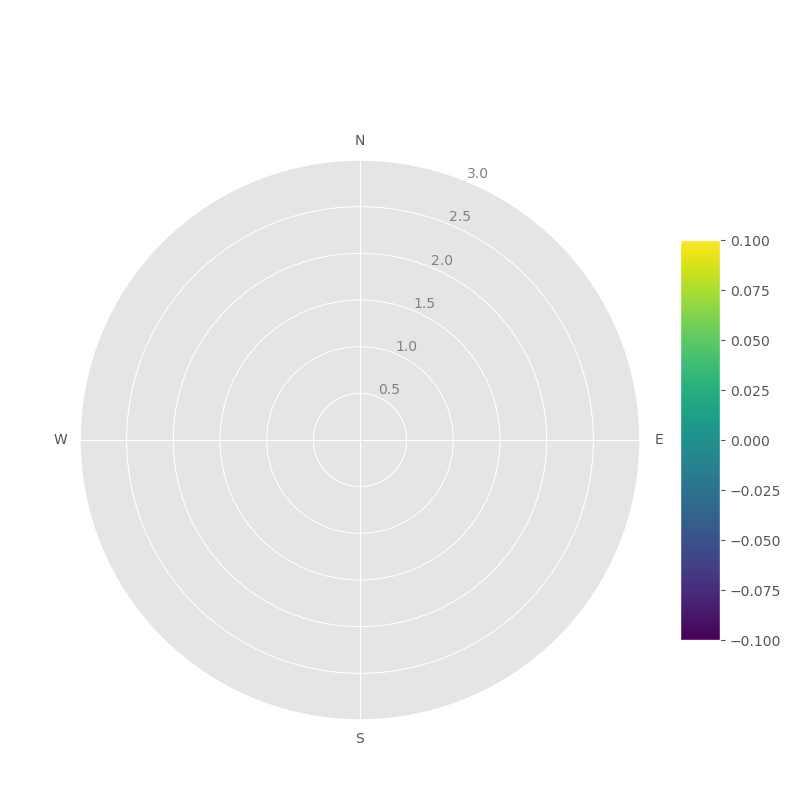

'\n1) \nCLICK ON BLUE BAR TO EXPAND\n'

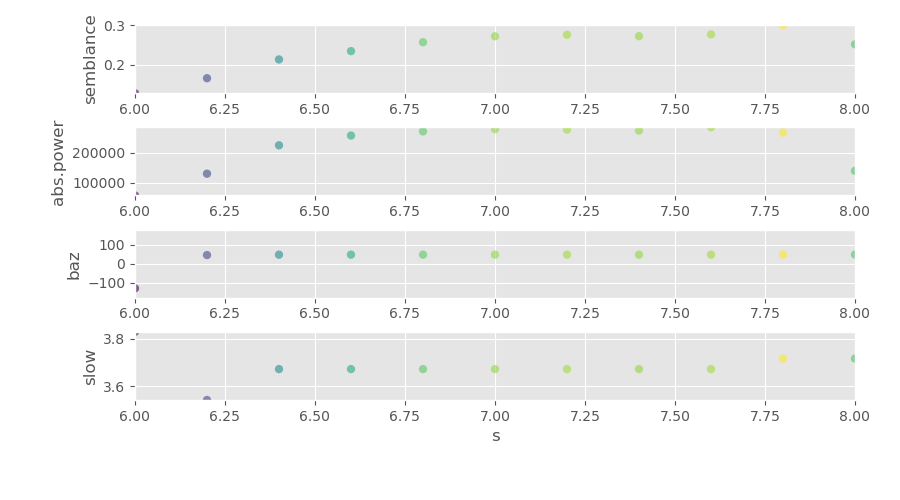

In [7]:
"""
====================== BEAMFORMING ======================
"""
dummy = UTCDateTime()
# ---------- Use FK Analysis
out, stime, etime = u.BeamFK(gather, [MTparam[3], MTparam[4]], ttb_gloc)
print("\n>> Total time in Beamforming: %f\n" % (UTCDateTime() - dummy))
#---------- Change output
t, rel_power, abs_power, baz, slow = out.T
#--- Time
T = np.linspace(stime, etime, num=len(out))
#--- Semblance -> Fisher
F = (len(gather)-1) * out[:, 1] / (1 - out[:, 1])
#--- FK power
FKp = out[:, 2]
#--- baz
#out[:, 3] = out[:, 3] % 360.
baz = baz % 360.
#--- Slowness -> Velocity
V = 1.e3 / out[:,4]
#------------- print
sys.stdout.write('\n')
print(f'\n>>  t   Fisher  FKpwr   baz(deg) vel(m/s)')    
for i in range(len(out)):
    print(f'   {round(T[i],2)}, {round(F[i],2)}, {round(FKp[i],2)}, {round(baz[i],2)}, {round(V[i],2)}')    
#------------ Plot
p.pltbaz(out, stime , etime)
"""
1) 
CLICK ON BLUE BAR TO EXPAND
"""

## Surface Wave Tomography
- The two types of surface waves are the Rayleigh and Love waves. Rayleigh waves (ground roll) move both longitudinally and horizontally and result in elliptical movement, retrograde to the direction of propagation. Love waves move horizontally and at right angles to the direction of propagation, as like S-waves they cannot propagate in fluids.
<img src="./RayLo.png" width="600">
### Dispersion of surface waves
Longer period surface waves penetrate deeper into higher speed layers, so they will travel faster. This results that velocities increase inversely proportional to period.

- Apply a few bandpass filters and measure the corresponding group velocity dispersion curve.


 Enter num_interv and ovelap (rtn=6 0.2): 



>> gather will be sliced from 6.0 to 8.0s,
    or from 2022-04-02T13:41:50.000000Z to 2022-04-02T13:41:52.000000Z.

>> Work with phone 11
Filter interval 1: (5.0, 12.5)
Filter interval 2: (11.0, 18.5)
Filter interval 3: (17.0, 24.5)
Filter interval 4: (23.0, 30.5)
Filter interval 5: (29.0, 36.5)
Filter interval 6: (35.0, 42.5)
7 Trace(s) in Stream:
TTB22.11.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.996000Z | 250.0 Hz, 15000 samples
TTB22.11.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.996000Z | 250.0 Hz, 15000 samples
TTB22.11.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.996000Z | 250.0 Hz, 15000 samples
TTB22.11.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.996000Z | 250.0 Hz, 15000 samples
TTB22.11.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.996000Z | 250.0 Hz, 15000 samples
TTB22.11.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.996000Z | 250.0 Hz, 15000 samples
TTB22.11.0.HHZ | 2022-04-02T13:41:44.00000

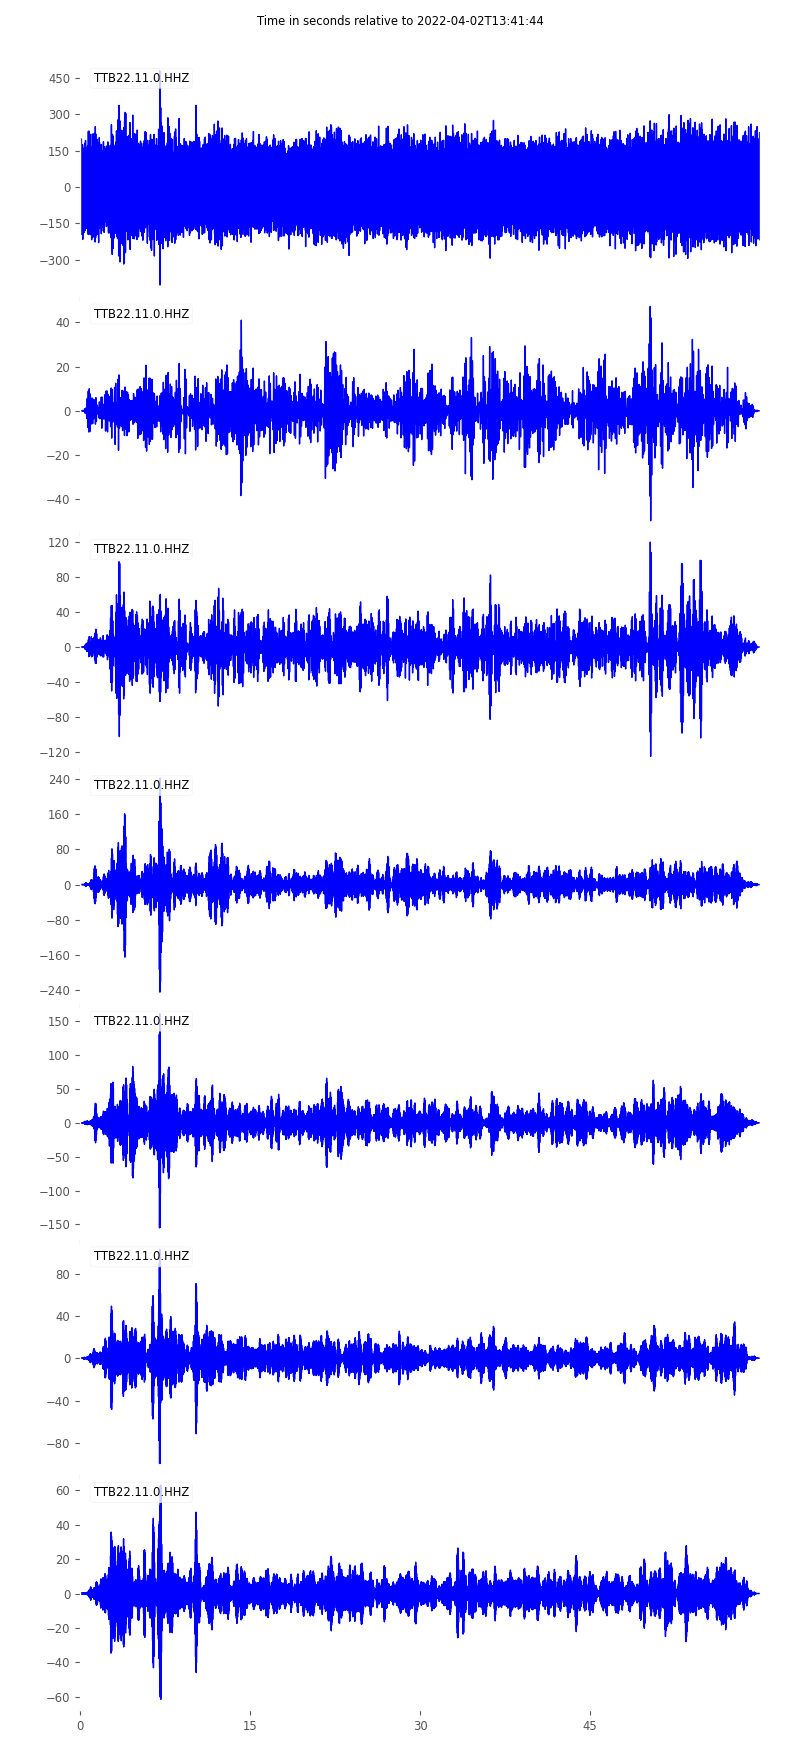

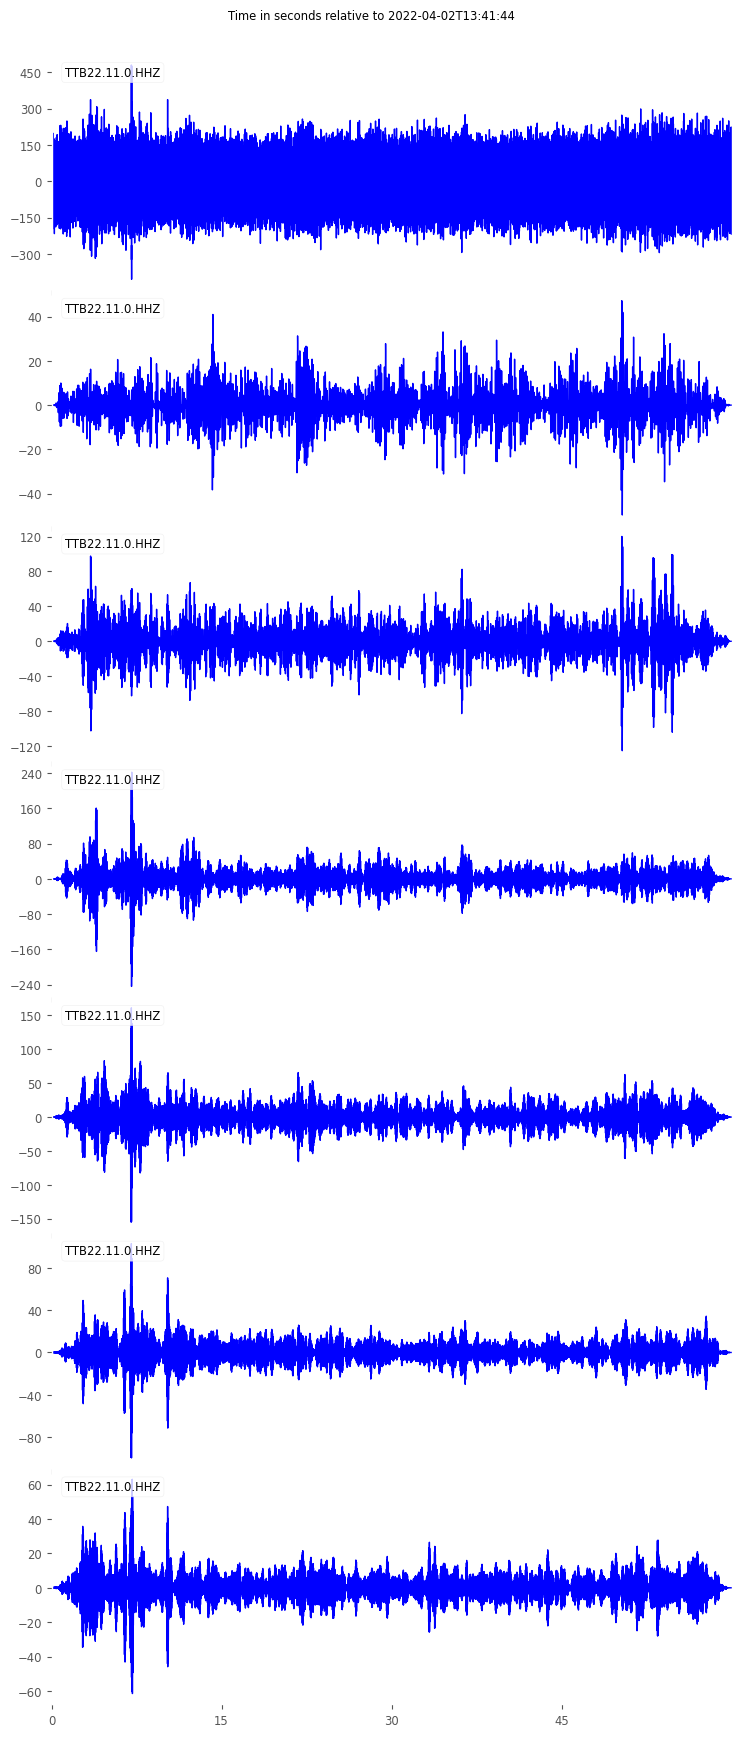

In [8]:
"""
Divides an interval into sub-intervals with a specified overlap.
Args:
    start: The start of the interval.
    end: The end of the interval.
    ninter: The number of sub-intervals to create.
    over: The overlap as a percentage of the sub-interval length (0-1).
Returns:
    A list of tuples, where each tuple represents a sub-interval (start, end).
    Returns an empty list if the input is invalid.
"""
def div_interval(start, end, ninter, over):
    if not (0 <= over <= 1):
        print("Error: Overlap percentage must be between 0 and 1.")
        return []
    if ninter <= 0 :
        print("Error: Number of subintervals must be greater than 0.")
        return []
    if start >= end:
        print("Error: Start must be less than end.")
        return []

    ilen = end - start
    sublen = ilen / ninter
    overlap = over * sublen
    subintervals = []

    current_start = start
    for _ in range(ninter):
        current_end = current_start + sublen
        subintervals.append((current_start, min(current_end, end)))  # Ensure the last subinterval doesn't exceed the end
        current_start = current_end - overlap

    return subintervals

# -------------- End of function   ---------------------
"""
====================== A CHAIN OF BP FILTERS ======================
"""
#------ Frequency intervals
ent = '6 0.2' 
ent = input(f'\n Enter num_interv and ovelap (rtn={ent}):') or ent
ent = ent.rstrip().split(' ')
num_intervals, overlap_percent = [int(ent[0]), float(ent[1])]
#
subintervals = div_interval(MTparam[3], MTparam[4], num_intervals, overlap_percent)
#
#------ Trim umnprocessed gather to Zoomed interval above
dummy = UTCDateTime(gather0[0].stats.starttime)
print(f'\n>> gather will be sliced from {stime} to {etime}s,')
stime0 = dummy + stime
etime0 = dummy + etime
print(f'    or from {stime0} to {etime0}.')
gather0.slice(starttime=stime0, endtime=etime0)
#
#------ Create an empty stream
estrm = Stream()
#------ Pick up a random phone/trace. Add to the stream
trnum = np.random.randint(1, len(gather))
print(f'\n>> Work with phone {trnum+1}')
tr = gather0[trnum]
estrm += tr
#
#------ 
if subintervals:
  for i, subinterval in enumerate(subintervals):
      print(f"Filter interval {i+1}: {subinterval}")
      freq_low, freq_high = subinterval
#------ Copy
      tr_copy = tr.copy()
#------ Remove the mean and trend
      tr_copy.detrend('demean').detrend('linear').taper(0.05)
#-------- Bandpass filter the data.
      ent = ['bp', freq_low, freq_high]
      tr_copy, ftype, flims = u.TrFlt(tr_copy, ent=ent)
#-------- Add
      estrm += tr_copy

print(estrm)

estrm.plot(color='blue', type='relative', equal_scale=False, automerge=False)  #handle=True, 




 Enter interval index 1 to 7: 1



>> Interval (5.0, 12.5) travtime = 50.34s,


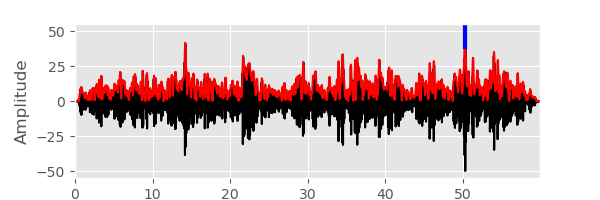

In [9]:
time = estrm[0].times(type="relative")
ent = input(f'\n Enter interval index 1 to {len(estrm)}:')
envelope = np.abs(obspy.signal.filter.envelope(estrm[int(ent)].data))
#-------- 
indexmax = np.argmax(envelope)
travtime = time[indexmax]
print(f'\n>> Interval {subintervals[int(ent)-1]} travtime = {travtime}s,')
#
plt.figure(figsize=(6, 2), dpi=100)
plt.plot(time, estrm[int(ent)].data, 'k-')
plt.plot(time, envelope, 'r-')
plt.axvline(travtime, 0.85, 1, color='b', lw=3)
plt.xlim(time[0], time[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show();

## Ambient Noise Cross-correlation
- Given two seismometers, $u_1$ and $u_2$, on the surface, will record ground motion as a function of time. Over long periods of time, the cross-correlation of ground motions is
$$C_{1,2}\left(\tau\right)=\int u_{1}\left(t\right)\,u_{2}\left(t+\tau\right)dt$$

- Data Preparation and inital processing
Prepare waveform data from each station separately to accentuate broad-band ambient noise.


<< Enter two phones: 2 9


2 Trace(s) in Stream:
TTB22.2.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.996000Z | 250.0 Hz, 15000 samples
TTB22.9.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.996000Z | 250.0 Hz, 15000 samples


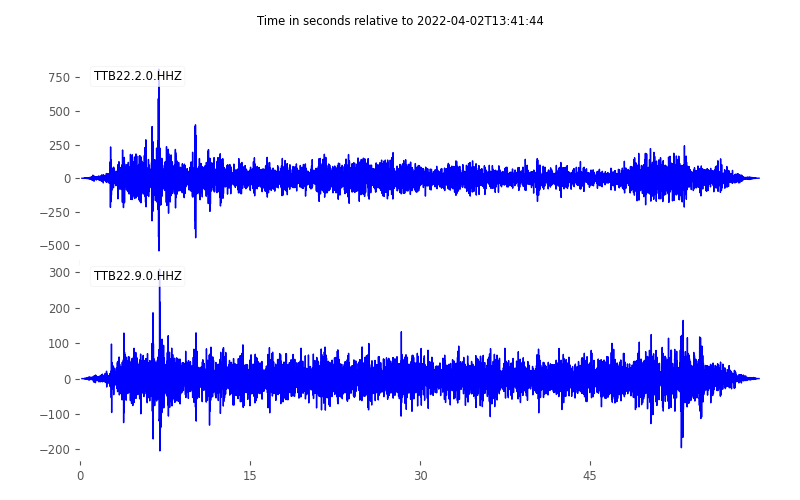

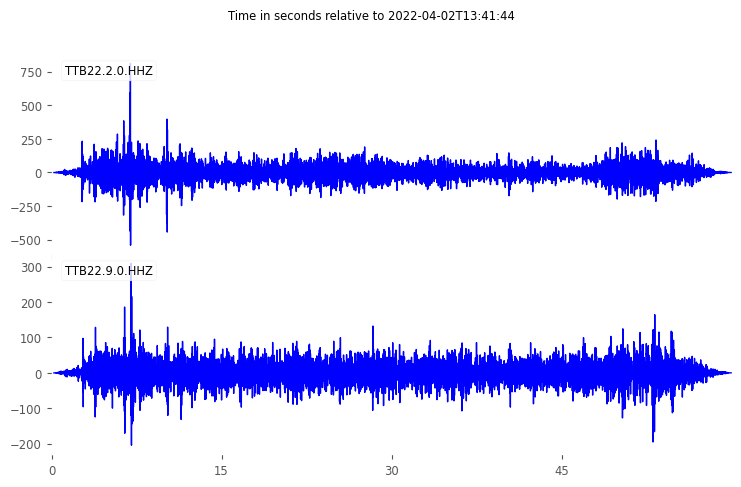

In [29]:
#------ Get two traces
ent = input(f'\n<< Enter two phones:')
if not ent: raise ValueError("t1 t2 mandatory.")
ntr1, ntr2 = np.array(ent.rstrip().split(' '), dtype=int)
#
#------ Create an empty stream
estrm = Stream()
estrm += gather[ntr1-1].copy()
estrm += gather[ntr2-1].copy()
print(estrm)
estrm.plot(color='blue', type='relative', equal_scale=False, automerge=False)  #handle=True, 

### Down-sampling Data
Ambient noise generally conducted in low frequency range, it will reduce computation cost if data is down-sampled.

In [30]:
ent = input(f'\n<< Enter decimation factor for phones {ntr1} and {ntr2}:')
if not ent: raise ValueError("t1 t2 mandatory.")
dfact = int(ent.rstrip().split(' ')[0])
print(f'\n>> Trace {ntr1-1} before down-sampling had {estrm[0].stats.npts} with sampling rate {estrm[0].stats.sampling_rate}')
estrm[0].decimate(factor=dfact)
print(f'    now has {estrm[0].stats.npts} with sampling rate {estrm[0].stats.sampling_rate}')
#
print(f'\n>> Trace {ntr2-1} before down-sampling had {estrm[1].stats.npts} with sampling rate {estrm[1].stats.sampling_rate}')
estrm[1].decimate(factor=dfact)
print(f'    now has {estrm[1].stats.npts} with sampling rate {estrm[1].stats.sampling_rate}')

fs_new = estrm[0].stats.sampling_rate


<< Enter decimation factor for phones 2 and 9: 5



>> Trace 1 before down-sampling had 15000 with sampling rate 250.0
    now has 3000 with sampling rate 50.0

>> Trace 8 before down-sampling had 15000 with sampling rate 250.0
    now has 3000 with sampling rate 50.0


### One-bit Normalization
Remove the non-stationary events that inevitably lie in seismic records by one-bit normalization. This consists of replacing each sample of a record by its sign. In this way each data point is replaced with either a 1 or -1, depending on its sign, which remove the amplitude information from the data.

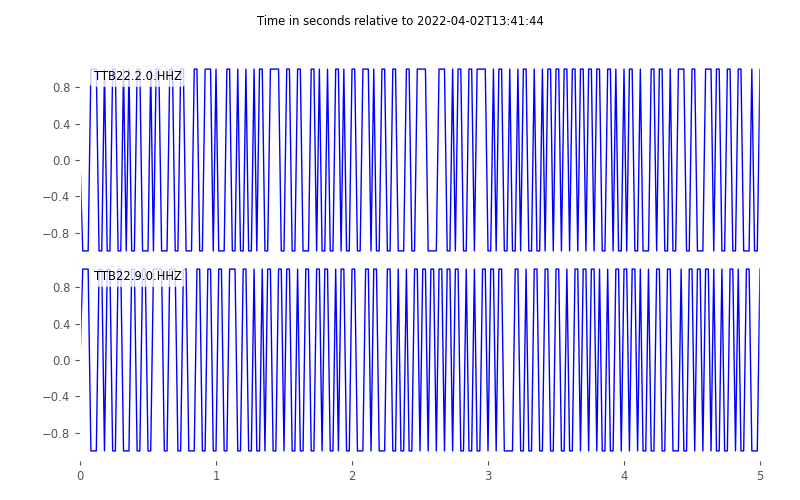

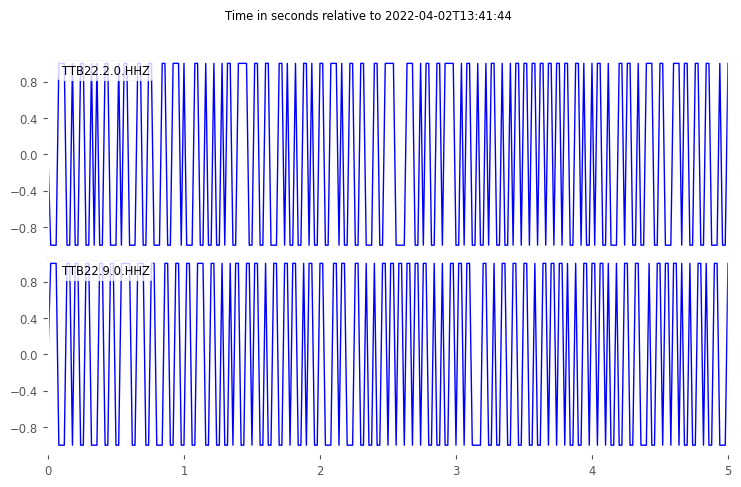

In [31]:
dummy = UTCDateTime(estrm[0].stats.starttime)
estrm[0].data = np.sign(estrm[0].data)
estrm[1].data = np.sign(estrm[1].data)

estrm.plot(starttime=dummy, endtime=dummy+5, color='blue', type='relative', equal_scale=False, automerge=False)


### Cross-Correlation


>> Correlate trace 1 with 3000 with trace 8 with 3000 points


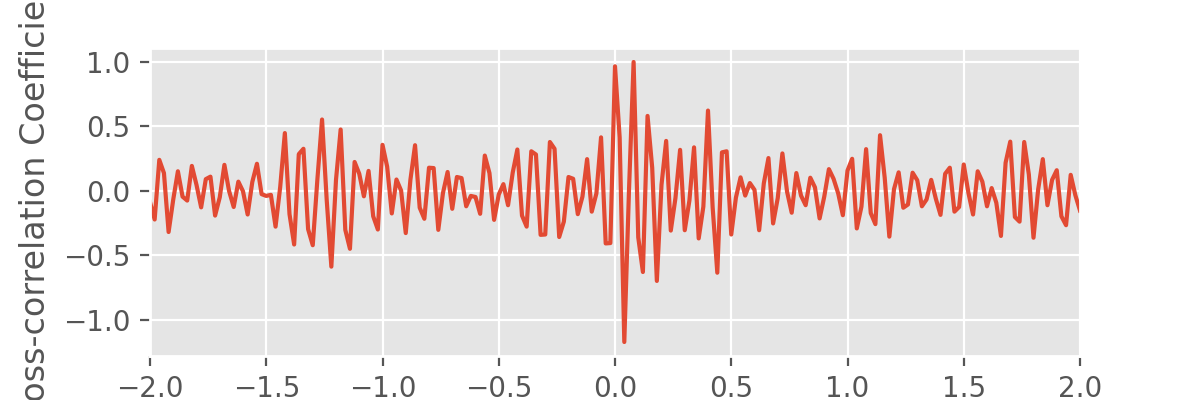

In [41]:
print(f'\n>> Correlate trace {ntr1-1} with {estrm[0].stats.npts} with trace {ntr2-1} with {estrm[1].stats.npts} points')
max_lagtime = 2
0
max_shift_num = int(np.round(max_lagtime*estrm[0].stats.sampling_rate))
data1 = estrm[0].data
data2 = estrm[1].data
len1 = len(data1)
len2 = len(data2)
min_len = min(len1,len2)
cross_list = []
for shift_num in np.arange(-max_shift_num,max_shift_num+1,1):
    if shift_num<0:
        correlate_value = np.correlate(data1[:min_len+shift_num],data2[-shift_num:min_len])
        cross_list.append(correlate_value.ravel())
    else:
        correlate_value = np.correlate(data2[:min_len-shift_num],data1[shift_num:min_len])
        cross_list.append(correlate_value.ravel())
cross_list = np.array(cross_list)
cross_list = cross_list/np.max(cross_list)
#

time = np.linspace(-max_lagtime,max_lagtime,int(2*max_lagtime*fs_new+1))

plt.figure(figsize=(6, 2), dpi=200)
plt.plot(time,cross_list)
plt.xlabel("Time (s)")
plt.ylabel("Cross-correlation Coefficient")
plt.xlim(-max_lagtime,max_lagtime)
plt.show();

---




